In [44]:
import numpy as np
from tensorflow import keras

def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20))
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)
    return series[..., np.newaxis].astype(np.float32)

In [11]:
n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

print('Series: ',series)
print(series.shape)
print('X Train:',X_train)
print(X_train.shape)
print('Y Train: ',y_train)
print(y_train.shape)

Series:  [[[-0.23643036]
  [-0.18228617]
  [-0.0568142 ]
  ...
  [-0.6167866 ]
  [-0.41807923]
  [-0.3014103 ]]

 [[ 0.19118749]
  [ 0.2934651 ]
  [ 0.3949101 ]
  ...
  [ 0.31614634]
  [ 0.41594025]
  [ 0.5356735 ]]

 [[ 0.52464515]
  [ 0.44103223]
  [ 0.17760512]
  ...
  [-0.18592957]
  [ 0.16615519]
  [ 0.4090717 ]]

 ...

 [[-0.3023711 ]
  [-0.08316951]
  [ 0.01961296]
  ...
  [-0.21473475]
  [ 0.00953582]
  [ 0.22411552]]

 [[ 0.6569381 ]
  [ 0.7006996 ]
  [ 0.531717  ]
  ...
  [-0.35150713]
  [-0.2821114 ]
  [-0.31063786]]

 [[ 0.07315657]
  [-0.13301802]
  [-0.19905634]
  ...
  [ 0.58108896]
  [ 0.4785419 ]
  [ 0.27502358]]]
(10000, 51, 1)
X Train: [[[-0.23643036]
  [-0.18228617]
  [-0.0568142 ]
  ...
  [-0.6753009 ]
  [-0.6167866 ]
  [-0.41807923]]

 [[ 0.19118749]
  [ 0.2934651 ]
  [ 0.3949101 ]
  ...
  [ 0.10951188]
  [ 0.31614634]
  [ 0.41594025]]

 [[ 0.52464515]
  [ 0.44103223]
  [ 0.17760512]
  ...
  [-0.36192834]
  [-0.18592957]
  [ 0.16615519]]

 ...

 [[-0.5841694 ]
  [

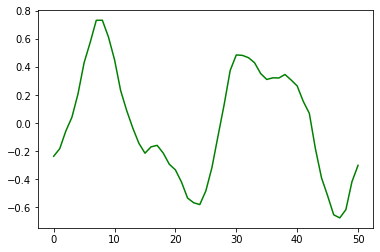

In [33]:
import matplotlib.pyplot as plt

plt.plot(series[0, :], '-g')
plt.show()

Lets do a naive forecasting which takes the last column and sets it to predicted and then compares it to the actual value.

In [45]:
y_pred = X_valid[:, -1]
np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

0.021135446

In [46]:
# Try a linear model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50,1]),
    keras.layers.Dense(1)
])

In [48]:
model.compile(loss=keras.losses.mean_squared_error, optimizer='adam')
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 1s 79us/sample - loss: 0.1723 - val_loss: 0.0520
Epoch 2/20
7000/7000 [==============================] - 0s 43us/sample - loss: 0.0387 - val_loss: 0.0271
Epoch 3/20
7000/7000 [==============================] - 0s 39us/sample - loss: 0.0226 - val_loss: 0.0175
Epoch 4/20
7000/7000 [==============================] - 0s 43us/sample - loss: 0.0154 - val_loss: 0.0131
Epoch 5/20
7000/7000 [==============================] - 0s 43us/sample - loss: 0.0119 - val_loss: 0.0109
Epoch 6/20
7000/7000 [==============================] - 0s 43us/sample - loss: 0.0101 - val_loss: 0.0096
Epoch 7/20
7000/7000 [==============================] - 0s 41us/sample - loss: 0.0090 - val_loss: 0.0087
Epoch 8/20
7000/7000 [==============================] - 0s 41us/sample - loss: 0.0081 - val_loss: 0.0079
Epoch 9/20
7000/7000 [==============================] - 0s 40us/sample - loss: 0.0074 - val_loss: 0.0074
Epoch 1

Lets try an RNN

In [49]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, 1])
])

In [50]:
model.compile(loss=keras.losses.mean_squared_error, optimizer='adam')
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 3s 438us/sample - loss: 0.2816 - val_loss: 0.2438
Epoch 2/20
7000/7000 [==============================] - 2s 311us/sample - loss: 0.2387 - val_loss: 0.2062
Epoch 3/20
7000/7000 [==============================] - 2s 323us/sample - loss: 0.2010 - val_loss: 0.1749
Epoch 4/20
7000/7000 [==============================] - 2s 310us/sample - loss: 0.1690 - val_loss: 0.1491
Epoch 5/20
7000/7000 [==============================] - 2s 322us/sample - loss: 0.1438 - val_loss: 0.1292
Epoch 6/20
7000/7000 [==============================] - 2s 307us/sample - loss: 0.1223 - val_loss: 0.1090
Epoch 7/20
7000/7000 [==============================] - 2s 307us/sample - loss: 0.1006 - val_loss: 0.0883
Epoch 8/20
7000/7000 [==============================] - 2s 311us/sample - loss: 0.0812 - val_loss: 0.0709
Epoch 9/20
7000/7000 [==============================] - 2s 324us/sample - loss: 0.0647 - val_loss: 0.055

In [51]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True,input_shape=[None,1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1)
])

In [52]:
model.compile(loss=keras.losses.mean_squared_error, optimizer='adam')
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 9s 1ms/sample - loss: 0.0408 - val_loss: 0.0094
Epoch 2/20
7000/7000 [==============================] - 7s 1ms/sample - loss: 0.0068 - val_loss: 0.0058
Epoch 3/20
7000/7000 [==============================] - 7s 1ms/sample - loss: 0.0054 - val_loss: 0.0070
Epoch 4/20
7000/7000 [==============================] - 7s 992us/sample - loss: 0.0047 - val_loss: 0.0042
Epoch 5/20
7000/7000 [==============================] - 7s 1ms/sample - loss: 0.0041 - val_loss: 0.0037
Epoch 6/20
7000/7000 [==============================] - 7s 991us/sample - loss: 0.0038 - val_loss: 0.0036
Epoch 7/20
7000/7000 [==============================] - 7s 987us/sample - loss: 0.0037 - val_loss: 0.0045
Epoch 8/20
7000/7000 [==============================] - 7s 989us/sample - loss: 0.0036 - val_loss: 0.0038
Epoch 9/20
7000/7000 [==============================] - 7s 992us/sample - loss: 0.0035 - val_loss: 0.0039
Epoch 

In [53]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True,input_shape=[None,1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(1)
])

In [54]:
model.compile(loss=keras.losses.mean_squared_error, optimizer='adam')
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 6s 919us/sample - loss: 0.0229 - val_loss: 0.0055
Epoch 2/20
7000/7000 [==============================] - 6s 881us/sample - loss: 0.0044 - val_loss: 0.0043
Epoch 3/20
7000/7000 [==============================] - 6s 793us/sample - loss: 0.0037 - val_loss: 0.0037
Epoch 4/20
7000/7000 [==============================] - 5s 723us/sample - loss: 0.0034 - val_loss: 0.0033
Epoch 5/20
7000/7000 [==============================] - 6s 824us/sample - loss: 0.0033 - val_loss: 0.0033
Epoch 6/20
7000/7000 [==============================] - 6s 841us/sample - loss: 0.0033 - val_loss: 0.0033
Epoch 7/20
7000/7000 [==============================] - 7s 965us/sample - loss: 0.0032 - val_loss: 0.0033
Epoch 8/20
7000/7000 [==============================] - 5s 785us/sample - loss: 0.0032 - val_loss: 0.0033
Epoch 9/20
7000/7000 [==============================] - 5s 724us/sample - loss: 0.0030 - val_loss: 0.003

Forecasting several timesteps ahead

In [56]:
series = generate_time_series(1, n_steps + 10)
X_new, Y_new = series[:, :n_steps], series[:, n_steps:]
X = X_new
for step_ahead in range(10):
    y_pred_one = model.predict(X[:, step_ahead:])[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis=1)

Y_pred = X[:, n_steps:]
print(Y_pred)

[[[ 0.5681477 ]
  [ 0.6573052 ]
  [ 0.6553215 ]
  [ 0.5776591 ]
  [ 0.452183  ]
  [ 0.31786132]
  [ 0.19753003]
  [ 0.10179821]
  [ 0.03371797]
  [-0.01196287]]]


You can also use a sequence to model pattern, and in this case, you would need to just change the Dense(1) to Dense(10), but make sure your input data changes accordingly.

You can also use the TimeDistributed which does the reshaping for you.

In [57]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

How to deal woth unstable gradients with RNNs is to use LayerNormalisation, unfortunately this has to be done manually, as there is no layer normalisation code yet in keras.

In [63]:
class LNSimpleRNNCell(keras.layers.Layer):
    def __init__(self, units, activation="tanh", **kwargs):
        super().__init__(**kwargs)
        self.state_size = units
        self.output_size = units
        self.simple_rnn_cell = keras.layers.SimpleRNNCell(units, activation=None)
        self.layer_norm = keras.layers.LayerNormalization()
        self.activation = keras.activations.get(activation)
    
    def call(self, inputs, states):
        outputs, new_states = self.simple_rnn_cell(inputs, states)
        norm_outputs = self.activation(self.layer_norm(outputs))
        return norm_outputs, [norm_outputs]

In [64]:
model = keras.models.Sequential([
    keras.layers.RNN(LNSimpleRNNCell(20), return_sequences=True, input_shape=[None, 1]),
    keras.layers.RNN(LNSimpleRNNCell(20), return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

In [65]:
#LSTM which can be used to remember the beginning so to speak
model = keras.models.Sequential([
    keras.layers.LSTM(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.LSTM(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

What can also be done to help is that you can add a 1D Conv net in order to assist the RNN and in particular a GRU cell which is similar to LSTM.

In [67]:
model = keras.models.Sequential([
    keras.layers.Conv1D(filters=20, kernel_size=4, strides=2, padding="valid", input_shape=[None,1]),
    keras.layers.GRU(20, return_sequences=True),
    keras.layers.GRU(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss='mse', optimizer='adam')
history = model.fit(X_train, Y_train[:, 3::2], epochs=20, validation_data=(X_valid, Y_valid[:,3::2]))

NameError: name 'Y_train' is not defined